# Chapter 4 - Training Models

In [43]:
## Setup

# For plotting
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
%matplotlib inline

# Import numpy
import numpy as np

# Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression

# Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Ridge Regression using Scikit-Learn
from sklearn.linear_model import Ridge

# Lasso Regression using Scikit-Learn
from sklearn.linear_model import Lasso

# Elastic Net regression using Scikit-Learn
from sklearn.linear_model import ElasticNet

# Linear Regression using SGD
from sklearn.linear_model import SGDRegressor

# To add the x^n features to your data
from sklearn.preprocessing import PolynomialFeatures

# For scaling
from sklearn.preprocessing import StandardScaler

# For launching together multiple things
from sklearn.pipeline import Pipeline

# For the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone



In [2]:
## Functions

# The learning schedule function
# = the function that determines the learning rate
#   at each iteration
def learning_schedule(t, t0, t1):
    return t0 / (t + t1)

# Plot learning curves
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(2, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, len(X_train) , 0 , 5])
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend(['Training Set', 'Validation Set'])

## Linear Regression

__A linear model makes a prediction by simply computing a weighted sum of the input features__, plus a constant called the __bias term__ (also called the intercept term).


__Linear Regression Model Prediction__: $\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $

* $x_i$ is the $i^{th}$ feature
* $\theta_j$ is the $j^{th}$ model parameter
* $n$ is number of features
* $\hat{y}$ is the predicted value

__Linear Regression Model Prediction Vectorised Form__: $\hat{y} = h_{\theta}(x) = \theta^T \cdot x$

where:
* $x$ contains $x_0 = 1$
* $\theta$ is the model's parameters vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

To find the best $\theta$ parameters of the model, we will try to minimize the MSE cost function:

__MSE cost function for a Linear Regression model__: $MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})^2 $

To find the $\theta$ parameters that minimize the MSE there is a closed-form solution called the normal equation.

__The normal equation__: $\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

where:
* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

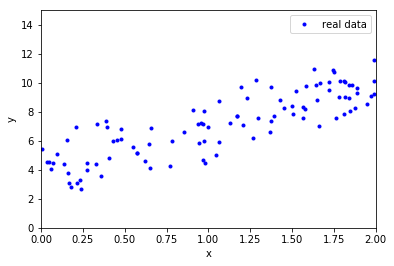

X.shape = (100, 1)
y.shape = (100, 1)


In [3]:
# Generate linear-looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['real data'])
plt.show()

print('X.shape = '+ str(X.shape))
print('y.shape = '+ str(y.shape))

In [4]:
# Calculate THETA

# Add the bias term:
X_b = np.c_[np.ones((100, 1)), X] # adding x0=1 to each instance
# Calculate theta
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print('X_b.shape = '+ str(X_b.shape))
print('theta_best.shape = '+ str(theta_best.shape))
print('theta_best = '+ str(theta_best[:,-1].tolist()))

X_b.shape = (100, 2)
theta_best.shape = (2, 1)
theta_best = [3.978372694003059, 2.9781162572228697]


In [5]:
# Make predictions

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # adding x0=1 to each instance
y_predict = X_new_b.dot(theta_best)

print('X_new.shape = '+ str(X_new.shape))
print('X_new_b.shape = '+ str(X_new_b.shape))
print('y_predict.shape = '+ str(y_predict.shape))
print('y_predict = '+ str(y_predict[:,-1].tolist()))

X_new.shape = (2, 1)
X_new_b.shape = (2, 2)
y_predict.shape = (2, 1)
y_predict = [3.978372694003059, 9.934605208448797]


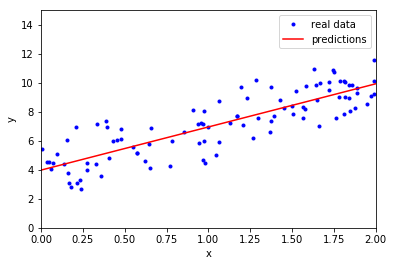

In [6]:
# Plot predictions against real data
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['real data','predictions'])
plt.show()


theta = [3.9783726940030553, [2.9781162572228728]]


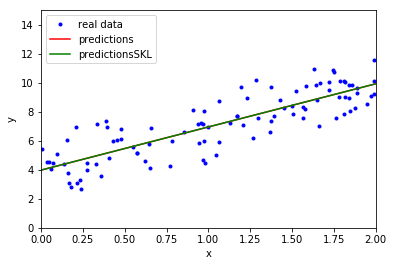

In [7]:
# Using scikit learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print('theta = ' + str([lin_reg.intercept_.tolist()[-1], lin_reg.coef_[:,-1].tolist()]))

y_predict_SKL = lin_reg.predict(X_new)

# Plot predictions with scikit learn against real data
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.plot(X_new, y_predict_SKL, "g-")
plt.axis([0, 2, 0, 15])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['real data','predictions', 'predictionsSKL'])
plt.show()

## Gradient Descent

__Gradient Descent__ is a very __generic optimization algorithm__ capable of finding optimal solutions to a wide range of problems. 

The general idea of __Gradient Descent__ is to __tweak parameters iteratively in order to minimize a cost function__.

__Gradient Descent__ measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. 

### Batch Gradient Descent

* You compute the gradient of the cost function with regards to each model parameter $\theta_j$. 
* In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. 

__MSE cost function for a Linear Regression model__: $MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})^2 $

__Partial derivative of the cost function__: $\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)}) x_j^{(i)}$

__Gradient vector of the cost function__: $\nabla_{\theta} MSE(\theta) = 
    \begin{pmatrix}
        \frac{\partial}{\partial \theta_0} MSE(\theta) \\
        \frac{\partial}{\partial \theta_1} MSE(\theta) \\
        \vdots  \\
        \frac{\partial}{\partial \theta_n} MSE(\theta) \\
 \end{pmatrix} =
     \frac{2}{m} X^T \cdot (X \cdot \theta - y)$
     
> __Observation__: _This formula involves calculations over the full training set $X$, at each Gradient Descent step! This is why the algorithm is called __Batch Gradient Descent__: it uses the whole batch of training data at every step._

__Gradient Descent step__: $\theta^{\text{(next step)}} = \theta - \eta \nabla_{\theta} MSE(\theta)$

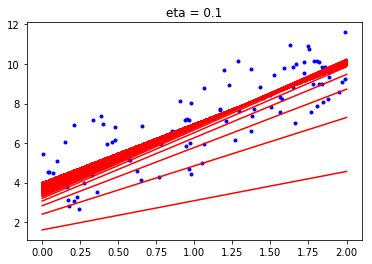

theta = [3.97837269 2.97811626]


In [8]:
# Gradient descent implementation

theta_ini = np.random.randn(2,1)

# Learning rate
eta = 0.1
n_iterations = 2000
m, n = X.shape

# Random initialisation
theta_GD = theta_ini

# Save thetas:
thetas_GD = np.zeros((n_iterations, 2))
theta_idx = 0

# Save cost function value:
J_GD = np.zeros((n_iterations, 1))

# Plot real values
plt.plot(X, y, "b.")

# Perform gradient descent for 1000 iterations
for iteration in range(n_iterations):
    # Calculate gradients of cost function
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_GD) - y)
    # Calculate cost function
    J_GD[theta_idx,0] = 1/m * np.abs(np.sum(X_b.dot(theta_GD) - y))
    # Save theta parameters
    thetas_GD[theta_idx, :] = theta_GD.ravel()
    theta_idx = theta_idx + 1
    # Update theta paramters
    theta_GD = theta_GD - eta * gradients
    # Predict with new theta
    y_predict_GD = X_new_b.dot(theta_GD)
    # Plot prediction
    plt.plot(X_new, y_predict_GD, "r-")

plt.title('eta = ' + str(eta))
plt.show()
print('theta = ' + str(theta_GD[:,-1]))    

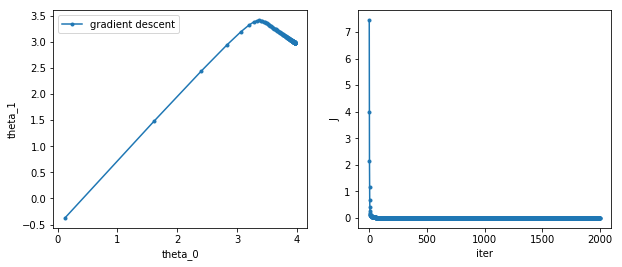

In [9]:
# Look at how the thetas changed
# And how the cost function changed

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 

plt.tight_layout()
# Thetas
ax0 = plt.subplot(gs[0])
ax0.plot(thetas_GD[:,0], thetas_GD[:,1], '.-')
ax0.xaxis.set_label_text('theta_0')
ax0.yaxis.set_label_text('theta_1')
ax0.legend(['gradient descent'])

# Cost function
ax1 = plt.subplot(gs[1])
ax1.plot(range(n_iterations), J_GD, '.-')
ax1.xaxis.set_label_text('iter')
ax1.yaxis.set_label_text('J')

plt.show()


### Stochastic Gradient Descent

* The main problem with _Batch Gradient Descent_ is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 
* At the opposite extreme, __Stochastic Gradient Descent__ just picks a random instance in the training set at every step and computes the gradients based only on that single instance.


* Randomness has two outcomes:
    * __Drawback__: Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, __the final parameter values are good, but not optimal__.
    * __Advantage__: Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. 
        > __Simulated Annealing__: One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the __learning schedule__.


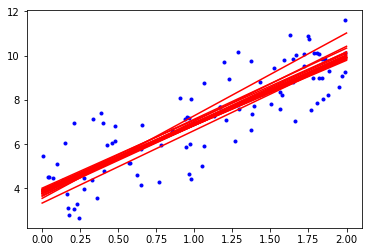

theta = [3.91638227 2.93687983]


In [10]:
n_epochs = 20
t0, t1 = 5, 50 # learning schedule hyperparameters

# Plot real values
plt.plot(X, y, "b.")

# Random initialisation
theta_SGD = theta_ini

# Save thetas:
thetas_SGD = np.zeros((n_epochs*m, 2))
theta_idx = 0

# Save cost function value:
J_SGD = np.zeros((n_epochs*m, 1))

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        # Calculate gradients of cost function
        gradients = 2 * xi.T.dot(xi.dot(theta_SGD) - yi)
        # Save cost function
        J_SGD[theta_idx,0] = 1/1 * np.abs(np.sum(xi.dot(theta_SGD) - yi))
        # Save theta parameters
        thetas_SGD[theta_idx, :] = theta_SGD.ravel()
        theta_idx = theta_idx + 1
        # Calculate new learning rate
        eta = learning_schedule(epoch * m + i, t0, t1)
        # Update theta paramters
        theta_SGD = theta_SGD - eta * gradients
    # Predict with new theta
    y_predict_SGD = X_new_b.dot(theta_SGD)
    # Plot prediction
    plt.plot(X_new, y_predict_SGD, "r-")
        
plt.show()
print('theta = ' + str(theta_SGD[:,-1]))    

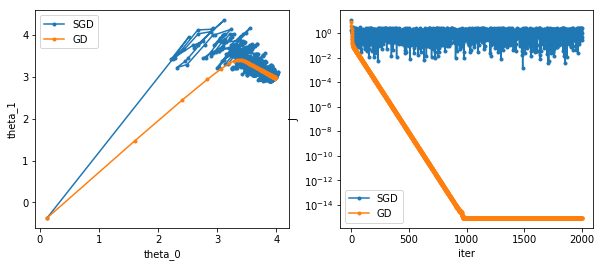

In [11]:
# Look at how the thetas changed
# And how the cost function changed

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 

plt.tight_layout()
# Thetas
ax0 = plt.subplot(gs[0])
ax0.plot(thetas_SGD[:,0],thetas_SGD[:,1], '.-')
ax0.plot(thetas_GD[:,0], thetas_GD[:,1], '.-')
ax0.xaxis.set_label_text('theta_0')
ax0.yaxis.set_label_text('theta_1')
ax0.legend(['SGD', 'GD'])

# Cost function
ax1 = plt.subplot(gs[1])
ax1.semilogy(range(n_iterations), J_SGD[:n_iterations,0], '.-')
ax1.semilogy(range(n_iterations), J_GD, '.-')
ax1.xaxis.set_label_text('iter')
ax1.yaxis.set_label_text('J')
ax1.legend(['SGD', 'GD'])

plt.show()



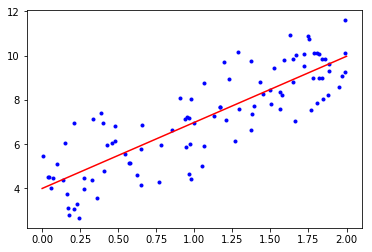

theta_SGDSKL = [3.99875099 2.98703339]


In [12]:
# Using the SGD regressor of Scikit learn

# Create regressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
# Fit regressor
sgd_reg.fit(X, y.ravel()) # ravel(): Return a contiguous flattened array.
# Get theta
theta_SGDSKL = np.c_[sgd_reg.intercept_.ravel(), sgd_reg.coef_.ravel()].ravel()

# Predict new values
y_predict_SGDSKL = sgd_reg.predict(X_new)

# Plot real values
plt.plot(X, y, "b.")
# Plot the predicted values
plt.plot(X_new, y_predict_SGDSKL, "r-")
        
plt.show()
print("theta_SGDSKL = " + str(theta_SGDSKL))

### Mini-Batch Gradient Descent

* At each step, __Batch GD__ computes the gradients on small random sets of instances called _mini-batches__. 
* The main advantage of __Mini-batch GD__ over __Stochastic GD__ is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs

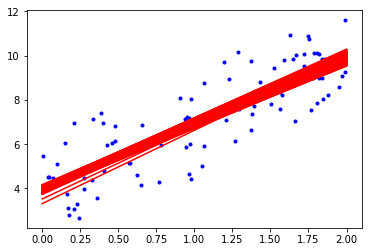

theta = [4.02501384 3.03853701]


In [13]:
n_epochs = 400
t0, t1 = 1, 5 # learning schedule hyperparameters
bs = 20 # batch size

eta = 0.01

# Plot real values
plt.plot(X, y, "b.")

# Random initialisation
theta_MBGD = theta_ini

# Save thetas:
thetas_MBGD = np.zeros((int(n_epochs*m/bs), 2))
theta_idx = 0

# Save cost function value:
J_MBGD = np.zeros((int(n_epochs*m/bs), 1))

for epoch in range(n_epochs):
    for i in range(int(m/bs)):
        random_index = np.random.randint(m-1)
        if random_index+bs <= m:
            xi = X_b[random_index:random_index+bs]
            yi =   y[random_index:random_index+bs]
        else:
            xi = np.r_[X_b[random_index:], X_b[0:(m-random_index)+bs-2]]
            yi = np.r_[  y[random_index:],   y[0:(m-random_index)+bs-2]]
        # Calculate gradients of cost function
        gradients = 2 * xi.T.dot(xi.dot(theta_MBGD) - yi)
        # Calculate cost function
        J_MBGD[theta_idx,0] = 1/bs * np.abs(np.sum(xi.dot(theta_MBGD) - yi))
        # Save theta parameters
        thetas_MBGD[theta_idx, :] = theta_MBGD.ravel()
        theta_idx = theta_idx + 1
        # Update theta paramters
        theta_MBGD = theta_MBGD - eta * gradients
    # Predict with new theta
    y_predict_MBGD = X_new_b.dot(theta_MBGD)
    # Plot prediction
    plt.plot(X_new, y_predict_MBGD, "r-")
        
plt.show()
print('theta = ' + str(theta_MBGD[:,-1]))    

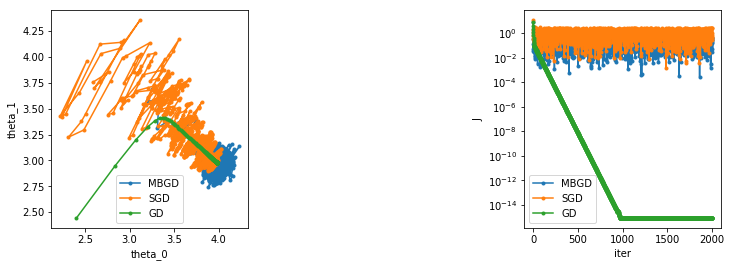

In [14]:
# Look at how the thetas changed
# And how the cost function changed

fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1]) 

plt.tight_layout()
# Thetas
ax0 = plt.subplot(gs[0])
ax0.plot(thetas_MBGD[2:,0],thetas_MBGD[2:,1], '.-')
ax0.plot( thetas_SGD[2:,0], thetas_SGD[2:,1], '.-')
ax0.plot(  thetas_GD[2:,0],  thetas_GD[2:,1], '.-')
ax0.xaxis.set_label_text('theta_0')
ax0.yaxis.set_label_text('theta_1')
#ax0.axis([3.5, 4.5, 2.5, 3.5])
ax0.legend(['MBGD', 'SGD', 'GD'])

# Cost function
ax1 = plt.subplot(gs[2])
ax1.semilogy(range(n_iterations), J_MBGD[:n_iterations,0], '.-')
ax1.semilogy(range(n_iterations), J_SGD[:n_iterations,0], '.-')
ax1.semilogy(range(n_iterations), J_GD[:n_iterations,0], '.-')
ax1.xaxis.set_label_text('iter')
ax1.yaxis.set_label_text('J')
ax1.legend(['MBGD', 'SGD', 'GD'])

plt.show()


## Polynomial Regression

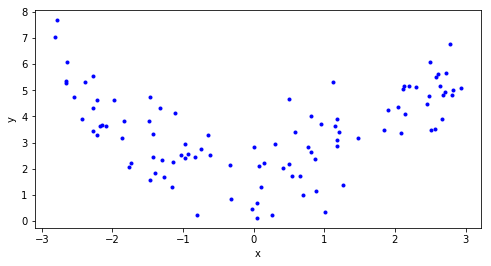

In [15]:
## Generate non-linear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + 2 + np.random.randn(m, 1)

fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1]) 

ax0 = plt.subplot(gs[0])
ax0.plot(X, y, 'b.')
ax0.xaxis.set_label_text('x')
ax0.yaxis.set_label_text('y')

plt.show()

In [16]:
## Add the 2nd degree polynomial features to the dataset
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-1.26594575,  1.60261865, -2.02882827])

theta = [1.9688359008056522, [0.3734859266552821, 0.4902145032527884, -0.07179806274231132]]
(100, 3)
(14, 1)


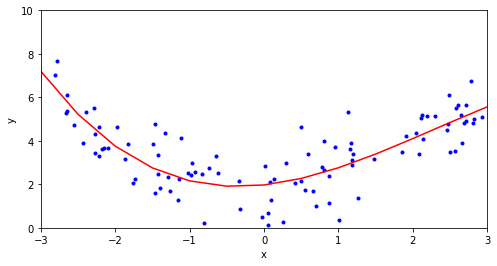

In [17]:
## Use linear regression on the transformed data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print('theta = ' + str([lin_reg.intercept_.tolist()[-1], lin_reg.coef_[-1,:].tolist()]))

# Predicted values
print(X_poly.shape)
X_poly_new = np.c_[np.arange(-3,4,0.5), np.arange(-3,4,0.5)**2, np.arange(-3,4,0.5)**3]
y_predict_POLYLR = lin_reg.predict(X_poly_new)
print(y_predict_POLYLR.shape)

# Plot
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1]) 

ax0 = plt.subplot(gs[0])
ax0.plot(X, y, 'b.')
ax0.plot(X_poly_new[:,0], y_predict_POLYLR, 'r-')
ax0.axis([-3, 3, 0, 10])
ax0.xaxis.set_label_text('x')
ax0.yaxis.set_label_text('y')

plt.show()

### Learning Curves

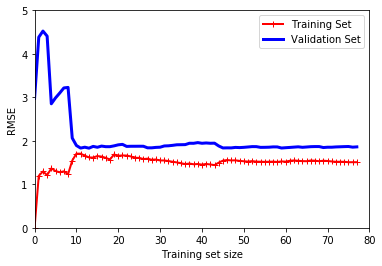

In [18]:
m = 100
FLAGLIN = 0;

if FLAGLIN:
    # Generate linear-looking data
    X = 2 * np.random.rand(m, 1)
    y = 4 + 3 * X + np.random.randn(m, 1)
else:
    ## Generate non-linear data
    X = 6 * np.random.rand(m, 1) - 3
    y = 0.5 * X**2 + 2 + np.random.randn(m, 1)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

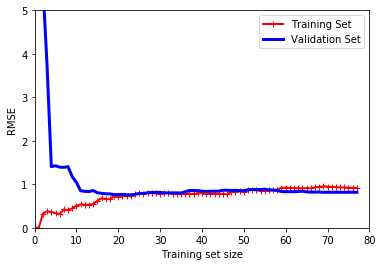

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
            ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
            ("sgd_reg", LinearRegression()),
            ))

plot_learning_curves(polynomial_regression, X, y)


## Regularised Linear Models

### Ridge Regression (Tikhonov regularization)
* __$l_2$ norm on the feature weights__
* Regularization term: $\alpha \sum_{i=1}^{n}\theta_i^2$
* Only added to the cost function during training, not during testing.
* If $\alpha=0$ ridge regression is just linear regression.
* If $\alpha>>$ all weights end up very close to zero and the result is a flat line going through the data's mean.

#### Ridge Regression Cost Function: $J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}\theta_i^2$
* Note: $\theta_0$ is not regularised

#### Closed-form solution: $\hat{\theta} = \big( X^T \cdot X + \alpha A\big)^{-1} \cdot X^T \cdot y$
> $L = \lvert\lvert y - X \theta \rvert\rvert^2_2 + \alpha \lvert\lvert \theta \rvert\rvert^2_2 \\
\frac{\partial{L}}{\partial{\theta}} = 
\frac{\partial}{\partial{\theta}} \big((y^T - \theta^T X^T)(y - \theta X) + \alpha \theta^T\theta \big) = 
\frac{\partial}{\partial{\theta}} \big( y^T y - y^T X \theta - \theta^T X^T y + \theta^T X^T X \theta + \alpha \theta^T \theta \big) \\
\frac{\partial{L}}{\partial{\theta}} = -y^TX + \theta^T X^T X + \alpha \theta^T = 0 \\
X^T y = (X^TX + \alpha I) \theta$

In [20]:
# Ridge regression
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[3.59746141]])

In [21]:
# Gradient descent with l2 penalty == ridge regression
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol = 1e-3)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.54105089])

### Lasso Regression
* _Least Absolute Shrinkage and Selection Operator Regression_ is another regularized version of _Linear Regression_
* Just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_1$ norm

#### Lasso Regression Cost Function: $J(\theta) = MSE(\theta) + \alpha  \sum_{i=1}^{n} \lvert \theta_i \rvert$


In [22]:
# Lasso regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([3.61571275])

In [23]:
# Gradient descent with l1 penalty == lasso regression
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol = 1e-3)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.53568745])

### Elastic Net
* _Elastic Net_ is a middle ground between _Ridge Regression_ and _Lasso Regression_. 
* The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. 
    * When r = 0, Elastic Net is equivalent to Ridge Regression, and 
    * When r = 1, it is equivalent to Lasso Regression

#### Elastic Net Cost Function: $J(\theta) = MSE(\theta) + r \alpha  \sum_{i=1}^{n} \lvert \theta_i \rvert + \frac{1-r}{2} \alpha \sum_{i=1}^{n}\theta_i^2$


In [24]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([3.61571275])

### Early Stopping
* At the beginning the validation error goes down, but after a while it goes back up indicating that the model has started to overfit the training data.
* This simple and efficient regularization technique is called a "beautiful free lunch"
* It relies on stopping the training where the prediction error is the minimim.

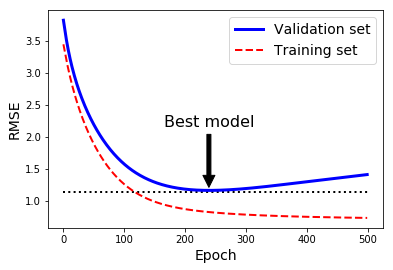

In [25]:
# Create some data
np.random.seed((42))
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# Split in train and test
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# Create pipeline
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

# Scale them
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Create a regressor
sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

## Logitstic Regression

* Logistic Regression model estimated probability: $\hat{p} = h_{\theta}(x) = \sigma (\theta^T \cdot x)$, where:
    * $\sigma(.)$ is the Sigmoid function that outputs a number between 0 and 1
    * $\sigma(t) = \frac{1}{1+exp(-t)}$
    
* Once the logistic regression model has estimated the probability $\hat{p} = h_{\theta}(x)$ that an instance x belongs to the positive class, it can make a prediction:
    * $\hat{y} = \begin{cases}
                    0 & \text{if } \hat{p}\lt 0.5\\
                    1 & \text{if } \hat{p}\geq 0.5
                 \end{cases}$
    * which means it predicts 1 if $\theta^T \cdot x$ is positive
    
* The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).
    * $c(\theta) = \begin{cases}
                      -log(\hat{p}) & \text{if } y = 1 \\
                      -log(1-\hat{p}) & \text{if } y = 0 
                   \end{cases}$
    * Interpretation:
        * $-log(\hat{p})$ grows large when $t \rightarrow 0$ so the cost will be large if the model estimates a probability close to 0 for a positive instance, and grows small when $t \rightarrow 1$ so the cost will be small if the model estimates a probability close to 1 for a positive instance.
        * $-log(1-\hat{p})$ grows large when $t \rightarrow 0$ so the cost will be large if the model estimates a probability close to 1 for a negative instance, and vice-versa.
        
        
        
* __The Logistic Regression cost function (log loss) is__:
    * $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \big[ y^{(i)} log(\hat{p}^{(i)}) + (1-y^{(i)}) log(1-\hat{p}^{(i)}) \big]$
    
    
* __The Logistic Regression cost function's partial derivatives__:
    * $\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \big( \sigma(\theta^T \cdot x^{(i)}) - y^{(i)} \big) x_j^{(i)}$

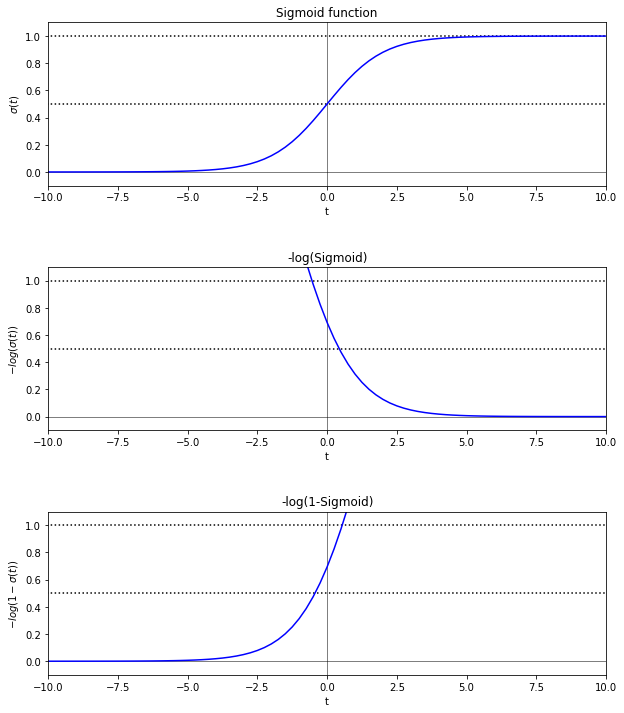

In [26]:
t = np.arange(-12,12,0.25)
sigm = 1 / (1 + np.exp(-t))

# Plotting the logistic regression function
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(3, 1, width_ratios=[1]) 
plt.tight_layout()

### FIRST PLOT - the sigmoind function
# Dotted lines
ax0 = plt.subplot(gs[0])
ax0.plot([-12, 12], [0.5, 0.5], "k:")
ax0.plot([-12, 12], [1, 1], "k:")
ax0.plot([-12, 12], [0, 0], "k-", linewidth=0.5)
ax0.plot([ 0, 0], [-1.1, 1.1], "k-", linewidth=0.5)

# The sigmoid function
ax0.plot(t, sigm, linewidth=1.5, linestyle="-", c="b")
# Properties of the plot
ax0.set_xlim([-10, 10])
ax0.set_ylim([-0.1, 1.1])
ax0.set_xlabel('t')
ax0.set_ylabel('$\sigma(t)$')
ax0.set_title('Sigmoid function')

### SECOND PLOT - the log of the sigmoind function
# Dotted lines
ax1 = plt.subplot(gs[1])
ax1.plot([-12, 12], [0.5, 0.5], "k:")
ax1.plot([-12, 12], [1, 1], "k:")
ax1.plot([-12, 12], [0, 0], "k-", linewidth=0.5)
ax1.plot([ 0, 0], [-1.1, 1.1], "k-", linewidth=0.5)

# The log of the sigmoid function
ax1.plot(t, -np.log(sigm), linewidth=1.5, linestyle="-", c="b")
# Properties of the plot
ax1.set_xlim([-10, 10])
ax1.set_ylim([-0.1, 1.1])
ax1.set_xlabel('t')
ax1.set_ylabel('$-log(\sigma(t))$')
ax1.set_title('-log(Sigmoid)')

### THIRD PLOT - the log of the sigmoind function
# Dotted lines
ax2 = plt.subplot(gs[2])
ax2.plot([-12, 12], [0.5, 0.5], "k:")
ax2.plot([-12, 12], [1, 1], "k:")
ax2.plot([-12, 12], [0, 0], "k-", linewidth=0.5)
ax2.plot([ 0, 0], [-1.1, 1.1], "k-", linewidth=0.5)

# The log of the sigmoid function
ax2.plot(t, -np.log(1-sigm), linewidth=1.5, linestyle="-", c="b")
# Properties of the plot
ax2.set_xlim([-10, 10])
ax2.set_ylim([-0.1, 1.1])
ax2.set_xlabel('t')
ax2.set_ylabel('$-log(1-\sigma(t))$')
ax2.set_title('-log(1-Sigmoid)')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.5)
plt.show()

### Decision Boundaries


In [27]:
print(list(iris.keys()))
print(iris["DESCR"])

['data', 'target', 'target_names', 'DESCR', 'feature_names']
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= =====

In [28]:
# Petal width
X = iris["data"][:, 3:] 
# 1 if Iris-Virginica, else 0
y = (iris["target"] == 2).astype(np.int) 

print(X.shape)
print(y.shape)


(150, 1)
(150,)


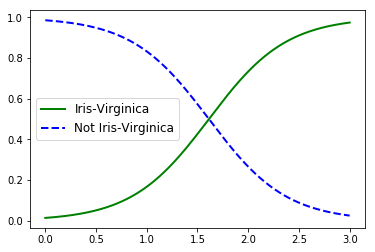

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Create new unseen data for petal width
X_new   = np.linspace(0,3,1000).reshape(-1,1)
# Predict type of flower with logistic regression
y_proba = log_reg.predict_proba(X_new)

# Plot probabilities for Iris
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
# Plot probabilities for Non-Iris
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.legend(loc="center left", fontsize=12)
plt.show()

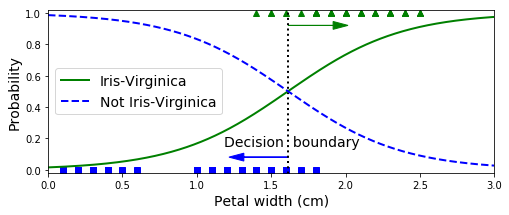

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
# Plot training values for IRIS
plt.plot(X[y==1], y[y==1], "g^")
# Plot training values for non-IRIS
plt.plot(X[y==0], y[y==0], "bs")
# Plot decision boundary
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
# Plot predicted probabilities for IRIS
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
# Plot predicted probabilities for non-IRIS
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
# Plot text
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
# Plot the arrows
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Properties of the plot
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

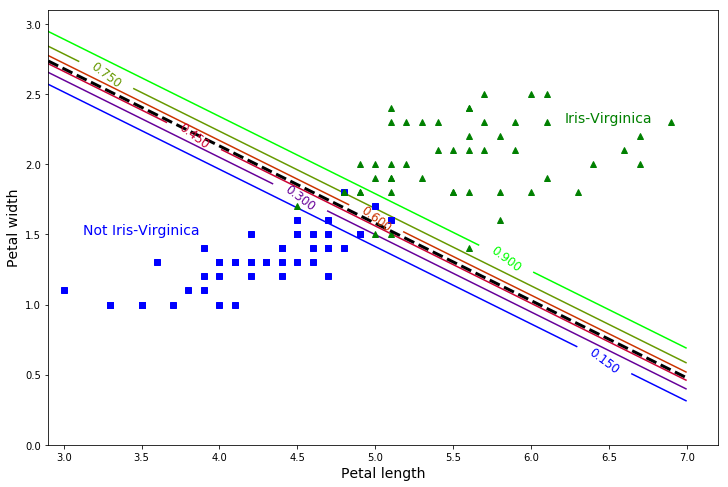

In [31]:
#### Logistic regression on two features:
# petal length and petal width
X = iris["data"][:, (2, 3)]  
y = (iris["target"] == 2).astype(np.int)

# C=10**10 so that it does not do any regularization
log_reg = LogisticRegression(C=10**10, random_state=42)
# Fit data
log_reg.fit(X, y)

# Prepare for plotting with a meshgrid
x0, x1 = np.meshgrid(
        np.linspace(2, 7, 500).reshape(-1, 1),
        np.linspace(0, 3, 200).reshape(-1, 1),
    )

# New data from the meshgrid
X_new = np.c_[x0.ravel(), x1.ravel()]
# Predict probabilities from the new data
y_proba = log_reg.predict_proba(X_new)

# PLOT
plt.figure(figsize=(12, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7.2, 0, 3.1])
plt.show()

## Softmax Regression

* __Softmax regression is logistic regression generalized to support multiple classes directly (it is multiclass, not multioutput)__
* How it works: computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function to the scores.
    * Softmax score for class k: $s_k(x) = \theta_k^T \cdot x$
    * Softmax function: $\hat{p}_k = \sigma(s(x))_K = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}$
        * $K$ = number of classes
        * $s(x)$ is a vector containing the scores of each class for the instance x
        * $\sigma(s(x))_k$ is the estimated probability that the instance x belongs to class k given the scores for that instance
    * Softmax regression classifier prediction: $\hat{y} = \underset{k}{\arg\max} \,\, \sigma(s(x))_k = \underset{k}{\arg\max} \,\, s_k(x) = \underset{k}{\arg\max} \,\, \big( \theta_k^T \cdot x\big)$
    
    
From the book:
> _The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes_

* __Cross entropy cost function__: $J(\Theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \, log \big( \hat{p}_k^{(i)} \big)$
    * $y_k^{(i)} = \begin{cases}
                    1 & \text{if the target classifier for the } i^{th} \text{ class is } k\\
                    0 & \text{otherwise}
                 \end{cases}$ 
    * When there are only two classes the cost function becomes the logistic regression's cost function

* __Cross entropy gradient vector for class k__: $\nabla_{\theta_k} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} \big( \hat{p}_k^{(i)} - y_k^{(i)} \big) x^{(i)} $

In [39]:
X = iris["data"][:, (2, 3)] # petal length, and petal width
y = iris["target"]

# Create logistic regression for multiple classes
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
# Predict class for petal length 5 and petal width 2
softmax_reg.predict([[5, 2]])

array([2])

In [41]:
# Show probabilities for all classes
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

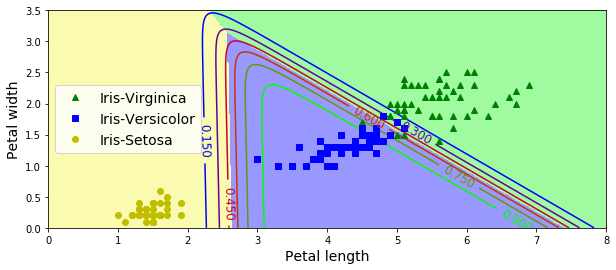

In [56]:
## SOFTMAX regression

# Create meshgrid of features for length and width
x0, x1 = np.meshgrid(
          np.linspace(0, 8, 500).reshape(-1, 1),
          np.linspace(0, 3.5, 200).reshape(-1, 1),
         )
# Create new data
X_new = np.c_[x0.ravel(), x1.ravel()]
# Calculate probabilities for the new data with SOFTMAX
y_proba = softmax_reg.predict_proba(X_new)
# Predict values for the new data
y_predict = softmax_reg.predict(X_new)

# Reshape the data
probsReshaped = y_proba[:, 1].reshape(x0.shape)
classesReshaped = y_predict.reshape(x0.shape)

## PLOT
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, probsReshaped, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 8, 0, 3.5])
plt.show()